In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
a2c = np.load('a2c.npy', allow_pickle=True)

In [45]:
timesteps, rewards = np.array([list(exp.keys())[0] for exp in a2c]), np.array([list(exp.values())[0] for exp in a2c])

In [46]:
data = pd.DataFrame([timesteps, rewards], index=['timesteps', 'rewards']).T

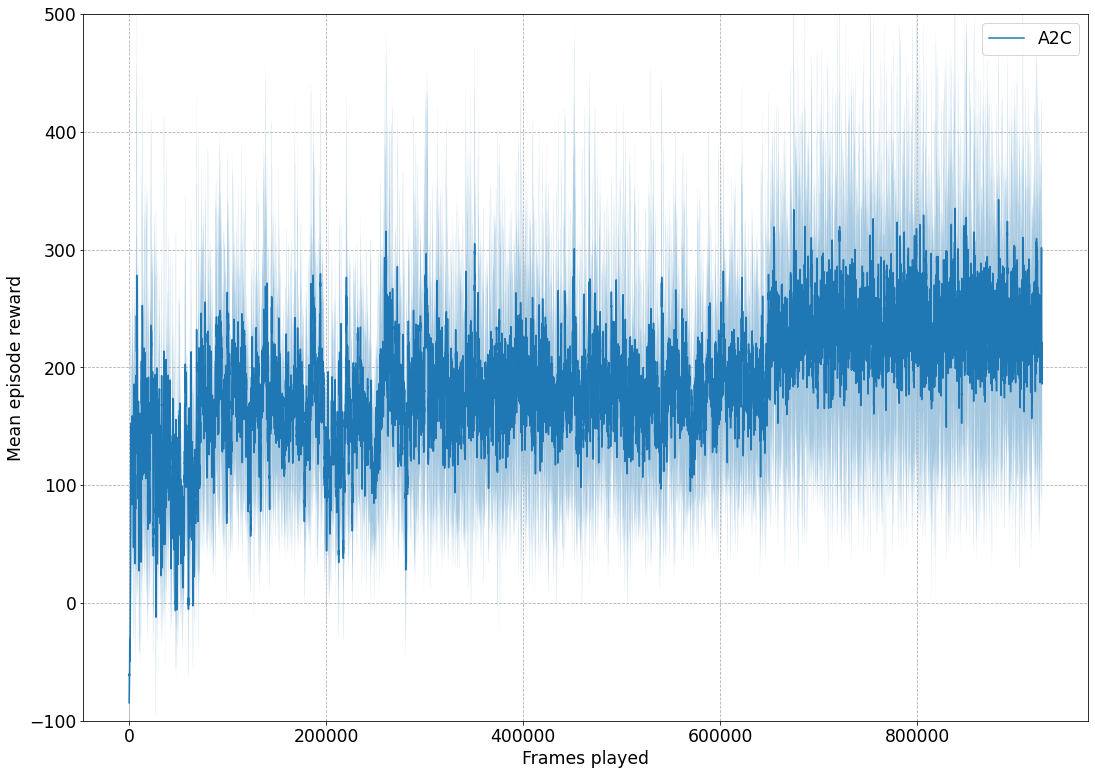

In [89]:
fig, ax = plt.subplots(figsize=(18,13))
rolling_series = data['rewards'][::-1].rolling(window=20)
running_means = rolling_series.mean()[::-1].iloc[:-20].values
running_stds = rolling_series.std()[::-1].iloc[:-20].values
cis = (running_means - running_stds, running_means + running_stds)
ax.fill_between(timesteps[:-20], cis[0], cis[1], alpha=0.4)
ax.plot(timesteps[:-20], running_means, label='A2C')
ax.legend(fontsize='xx-large')
ax.grid(linestyle='--')
ax.set_ylim(-100, 500);
plt.ylabel('Mean episode reward', fontdict={'fontsize': 'xx-large'})
plt.xlabel('Frames played', fontdict={'fontsize': 'xx-large'});
ax.tick_params(axis='both', which='major', labelsize='xx-large')

In [90]:
timesteps[-1]

927036